In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import skimage as sk
import skimage.feature
import skimage.io as skio
import sklearn
import sklearn.preprocessing
import cv2
import math



# Part 1

## Part 1.1

### Partial Derivatives

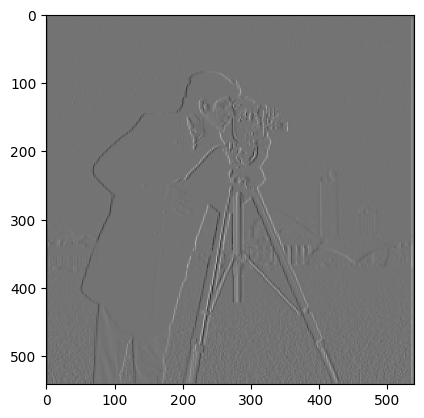

In [3]:
dx = np.matrix([[1, -1]])
dy = np.matrix([[1], [-1]])


# name of the input file
imname = 'cameraman.png'

# read in the image
im = plt.imread(imname)
im = im[:,:,0]
# print(im)


#convolve w dx
xderivative = scipy.signal.convolve2d(im, dx, mode='same')
plt.imsave('.gitignore/xderivative.jpg', xderivative,  cmap='gray')
plt.imshow(xderivative, cmap="gray")
plt.show()


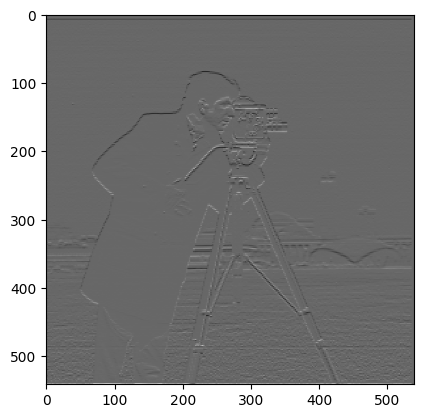

In [4]:
#convolve w dy
yderivative = scipy.signal.convolve2d(im, dy, mode='same')
plt.imsave('.gitignore/yderivative.jpg', yderivative,  cmap='gray')
plt.imshow(yderivative, cmap="gray")
plt.show()


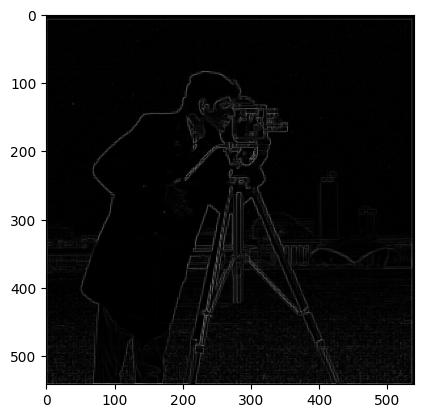

In [5]:
#gradient magnitude image
gradient_magnitude = np.sqrt(np.square(xderivative) + np.square(yderivative))
plt.imsave('.gitignore/gradient_magnitude.jpg', gradient_magnitude,  cmap='gray')
plt.imshow(gradient_magnitude, cmap="gray")

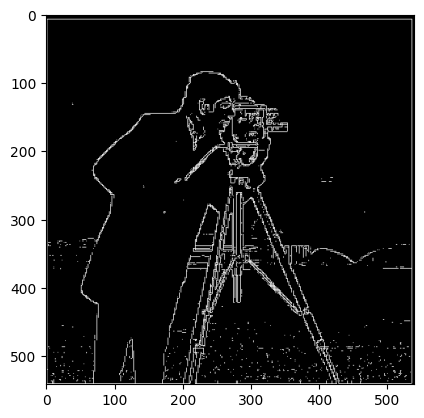

In [6]:
#binarize
binarized = sklearn.preprocessing.binarize(gradient_magnitude, threshold = 0.19)
plt.imsave('.gitignore/binarized.jpg', binarized,  cmap='gray')
plt.imshow(binarized, cmap="gray")

## Part 1.2

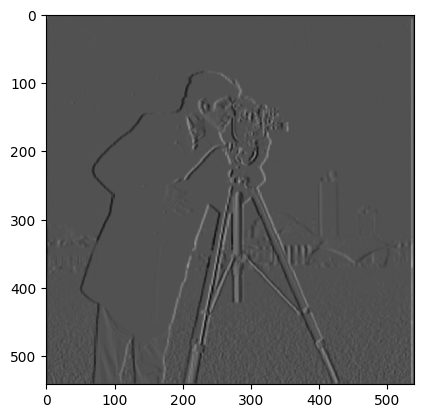

In [7]:
#get 2d Gaussian kernel
kernel1d = cv2.getGaussianKernel(3, 2)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))

#Gaussian blur x derivative
blurred = scipy.signal.convolve2d(im, kernel2d, mode='same')
smoothed_xderivative = scipy.signal.convolve2d(blurred, dx, mode='same')
plt.imsave('.gitignore/smoothed_xderivative.jpg', smoothed_xderivative,  cmap='gray')
plt.imshow(smoothed_xderivative, cmap='gray')

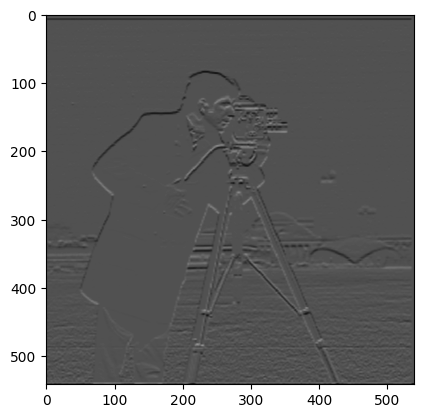

In [8]:
#Gaussian blur y derivative
smoothed_yderivative = scipy.signal.convolve2d(blurred, dy, mode='same')
plt.imsave('.gitignore/smoothed_yderivative.jpg', smoothed_yderivative,  cmap='gray')
plt.imshow(smoothed_yderivative, cmap='gray')


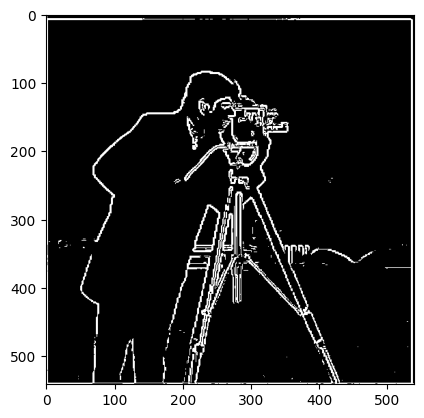

In [9]:
#binarized magnitude gradient image w Gaussian blurring
smoothed_gradient_magnitude = np.sqrt(np.square(smoothed_xderivative) + np.square(smoothed_yderivative))
plt.imsave('.gitignore/smoothed_gradient_magnitude.jpg', smoothed_gradient_magnitude,  cmap='gray')
smoothed_binarized = sklearn.preprocessing.binarize(smoothed_gradient_magnitude, threshold = 0.1)
plt.imsave('.gitignore/smoothed_binarized.jpg', smoothed_binarized,  cmap='gray')
plt.imshow(smoothed_binarized, cmap="gray")

# Part 2

## Part 2.1

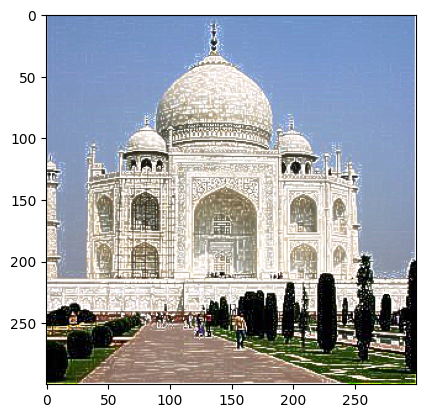

In [10]:

taj = plt.imread('taj.jpg')

# 2d Gaussian kernel
kernel1d = cv2.getGaussianKernel(3, 2)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))


# "Sharpening" function
def sharpen(im, kernel, alpha):

    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]

    def sub(im):
        #get low and frequency images
        low_freq = scipy.signal.convolve2d(im, kernel, mode='same')
        low_freq = np.clip(low_freq, 0, 255)
        high_freq = np.subtract(im, low_freq)
        high_freq = np.clip(high_freq, 0, 255)
        
        #add more high frequencies
        sharpened = np.add(im, alpha*high_freq)
        sharpened - np.clip(sharpened, 0, 255)


        return sharpened
    
    r = sub(r)
    g = sub(g)
    b = sub(b)
    combined = np.dstack([r, g, b])
    combined = combined/255
    combined = np.clip(combined, 0, 1)
    return combined

im_out = sharpen(taj, kernel2d, 10)
im_out = np.clip(im_out, 0, 1)
plt.imsave('.gitignore/taj_10.jpg', im_out)
plt.imshow(im_out)

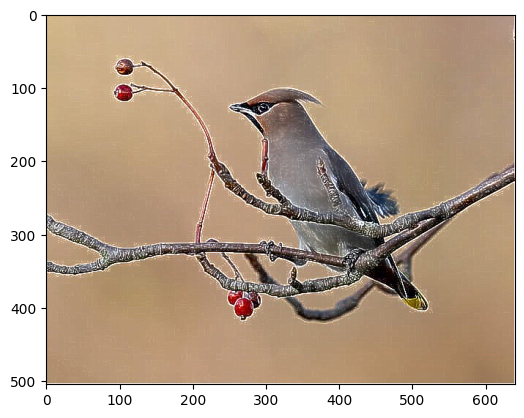

In [11]:
bird = plt.imread('bird.jpg')
im_out = sharpen(bird, kernel2d, 10)
im_out = np.clip(im_out, 0, 1)
# print(im_out)
plt.imsave('.gitignore/bird_10.jpg', im_out)
plt.imshow(im_out)

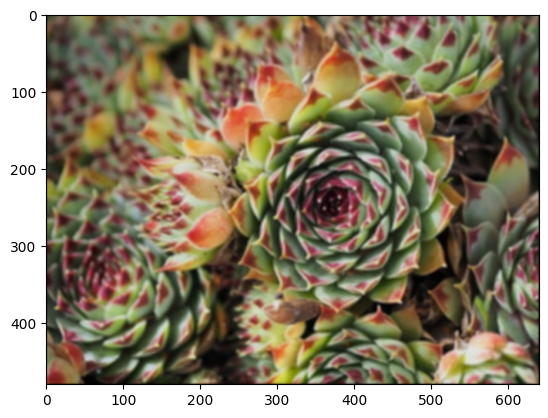

In [12]:
#blurring already sharp image

kernel1d = cv2.getGaussianKernel(5, 2)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))

succulent = plt.imread('succulent.jpg')

def blur(im, kernel):


    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]


    r = scipy.signal.convolve2d(r, kernel, mode='same')
    r = np.clip(r, 0, 255)
    

    g = scipy.signal.convolve2d(g, kernel, mode='same')
    g = np.clip(g, 0, 255)

    b = scipy.signal.convolve2d(b, kernel, mode='same')
    b = np.clip(b, 0, 255)

    ret = np.dstack([r,g,b])
    # print(ret.shape)

    return ret

blurred = blur(succulent, kernel2d)/255
plt.imsave('.gitignore/blurred_succulent.jpg', blurred)
plt.imshow(blurred)



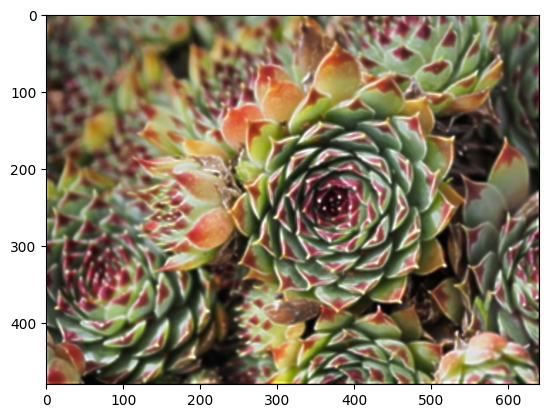

In [13]:
#resharpening
blurred255 = blurred * 255
resharpened = sharpen(blurred255, kernel2d, 3)
plt.imsave('.gitignore/resharpened_succulent.jpg', resharpened)
plt.imshow(resharpened)

## Part 2.2

In [4]:
#Hybrid Image function
def hybrid_image(im1, im2, sigma1, sigma2):

    im1 = skimage.color.rgb2gray(im1)
    im2 = skimage.color.rgb2gray(im2)

    #low-pass im1
    kernel1 = cv2.getGaussianKernel(50, sigma1)
    kernel1 = np.matmul(kernel1, np.transpose(kernel1))

    low_pass1 = scipy.signal.convolve2d(im1, kernel1, mode='same')

    #high-pass im2
    kernel2 = cv2.getGaussianKernel(50, sigma2)
    kernel2 = np.matmul(kernel2, np.transpose(kernel2))

    low_pass2 = scipy.signal.convolve2d(im2, kernel2, mode='same')
    high_pass2 = np.subtract(im2, low_pass2)
    high_pass2 = np.clip(high_pass2, 0, 1)

    return np.add(low_pass1, high_pass2)


In [6]:
import matplotlib.pyplot as plt

from align_image_code import align_images

# First load images

# high sf
im1 = plt.imread('./DerekPicture.jpg')/255.

# low sf
im2 = plt.imread('./nutmeg.jpg')/255.

# Next align images (this code is provided, but may be improved)
im2_aligned, im1_aligned = align_images(im2, im1)

## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

sigma1 = 30
sigma2 = 30
hybrid = hybrid_image(im1_aligned, im2_aligned, sigma1, sigma2)

plt.imsave('.gitignore/catderek.jpg', hybrid)
plt.imshow(hybrid, cmap='gray')


Please select 2 points in each image for alignment.


In [30]:
#FFT 
fft_cat = np.log(np.abs(np.fft.fftshift(np.fft.fft2(skimage.color.rgb2gray(im2)))))
plt.imsave('.gitignore/fft_cat.jpg', fft_cat)
plt.imshow(fft_cat)

fft_derek = np.log(np.abs(np.fft.fftshift(np.fft.fft2(skimage.color.rgb2gray(im1)))))
plt.imsave('.gitignore/fft_derek.jpg', fft_derek)
plt.imshow(fft_derek)

fft_hybrid = np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid))))
plt.imsave('.gitignore/fft_hybrid.jpg', fft_hybrid)
plt.imshow(fft_hybrid)

### More Hybrid Images

Please select 2 points in each image for alignment.


<function matplotlib.pyplot.show(close=None, block=None)>

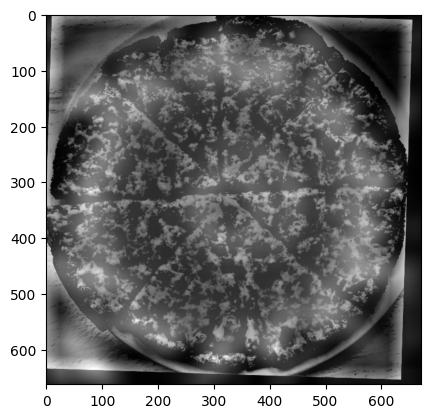

In [16]:
# First load images

# high sf
im1 = plt.imread('flower.webp')/255.

# low sf
im2 = plt.imread('pizza.webp')/255.

# Next align images (this code is provided, but may be improved)
im2_aligned, im1_aligned = align_images(im2, im1)

## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

sigma1 = 40
sigma2 = 40
hybrid = hybrid_image(im1_aligned, im2_aligned, sigma1, sigma2)

plt.imshow(hybrid, cmap='gray')
plt.imsave('.gitignore/flowerpizza.jpg', hybrid)
plt.show

In [24]:
# First load images

# high sf
im1 = plt.imread('kamala.jpg')/255.

# low sf
im2 = plt.imread('obama.webp')/255.

# Next align images (this code is provided, but may be improved)
im2_aligned, im1_aligned = align_images(im2, im1)

## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

sigma1 = 10
sigma2 = 10
hybrid = hybrid_image(im1_aligned, im2_aligned, sigma1, sigma2)


plt.imsave('.gitignore/obamakamala.jpg', hybrid)
plt.imshow(hybrid, cmap='gray')

Please select 2 points in each image for alignment.


## Part 2.3

In [26]:
def min_max_normalize(img):
    return (img-img.min())/(img.max()-img.min())

In [ ]:
%matplotlib inline

# Gaussian and Laplacian stacks for orange

kernel1d = cv2.getGaussianKernel(15, 5)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))

fig, axes = plt.subplots(2, 6, figsize = (10,5))


im = plt.imread('orange.jpeg')
axes[0,0].imshow(im)

collapsed = np.empty(im.shape)

for i in range(1, 6):

    gaussian = blur(im, kernel2d)
    
    plt.imsave('.gitignore/orange_gaussian' + str(i) + '.jpg', gaussian/255)
    axes[0, i].imshow(gaussian/255)

    laplacian = np.subtract(im, gaussian)
   
    laplacian_img= min_max_normalize(laplacian)
   
    collapsed += laplacian_img

    plt.imsave('.gitignore/orange_laplacian' + str(i-1) + '.jpg', laplacian_img)
    axes[1, i-1].imshow(laplacian_img)

    im = gaussian
    
collapsed = min_max_normalize(collapsed) + (gaussian/255)
collapsed = min_max_normalize(collapsed)

fig.text(0.5, 0.9, 'Gaussian Stack', ha='center', va='center', fontsize=12) 
fig.text(0.5, 0.45, 'Laplacian Stack', ha='center', va='center', fontsize=12) 

axes[1, 5].imshow(collapsed)

plt.tight_layout()
plt.show()

In [ ]:
# Gaussian and Laplacian stacks for apple

kernel1d = cv2.getGaussianKernel(15, 5)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))

fig, axes = plt.subplots(2, 6, figsize = (10,5))


im = plt.imread('apple.jpeg')
axes[0,0].imshow(im)

collapsed = np.empty(im.shape)

for i in range(1, 6):

    gaussian = blur(im, kernel2d)
    
    plt.imsave('.gitignore/apple_gaussian' + str(i) + '.jpg', gaussian/255)
    axes[0, i].imshow(gaussian/255)

    laplacian = np.subtract(im, gaussian)
   
    laplacian_img= min_max_normalize(laplacian)
   
    collapsed += laplacian_img

    plt.imsave('.gitignore/apple_laplacian' + str(i-1) + '.jpg', laplacian_img)
    axes[1, i-1].imshow(laplacian_img)

    im = gaussian
    
collapsed = min_max_normalize(collapsed) + (gaussian/255)
collapsed = min_max_normalize(collapsed)

axes[1, 5].imshow(collapsed)


fig.text(0.5, 0.9, 'Gaussian Stack', ha='center', va='center', fontsize=12) 
fig.text(0.5, 0.45, 'Laplacian Stack', ha='center', va='center', fontsize=12) 

plt.tight_layout()
plt.show()

### Recreating Figure 3.42

In [ ]:
apple = plt.imread('apple.jpeg')
orange = plt.imread('orange.jpeg')
mask = plt.imread('vertical_mask.jpg')
mask = np.clip(mask, 0, 1)

# Gaussian and Laplacian stacks

kernel1d = cv2.getGaussianKernel(17, 10)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))

def laplacian_blend(img1, img2, mask, level):


    img1_old = img1
    img2_old = img2


    for i in range(0, level):

        #gaussian blur mask
        mask = blur(mask, kernel2d)
        mask = np.clip(mask, 0, 1)


        #laplacian of img1
        img1 = blur(img1_old, kernel2d)
        img1_laplacian = np.subtract(img1_old, img1)
        img1_laplacian=(img1_laplacian-img1_laplacian.min())/(img1_laplacian.max()-img1_laplacian.min())

        #laplacian of img2
        img2 = blur(img2_old, kernel2d)
        img2_laplacian = np.subtract(img2_old, img2)
        img2_laplacian=(img2_laplacian-img2_laplacian.min())/(img2_laplacian.max()-img2_laplacian.min())

        #update values
        img1_old = img1
        img2_old = img2

    
    #combine masks with laplacians
    img1_masked = np.multiply(img1_laplacian, mask)
    img2_masked = img2_laplacian*(1-mask)

    blended = img1_masked + img2_masked
    return img1_masked, img2_masked, blended

fig, axes = plt.subplots(1, 3)

im1, im2, combined = laplacian_blend(apple, orange, mask, 4)
axes[0].imshow(im1)
axes[1].imshow(im2)
axes[2].imshow(combined)

plt.tight_layout()
plt.show()

## Part 2.4

In [ ]:
apple = plt.imread('apple.jpeg')
orange = plt.imread('orange.jpeg')
mask = plt.imread('vertical_mask.jpg')
mask = np.clip(mask, 0, 1)

# Gaussian and Laplacian stacks

kernel1d = cv2.getGaussianKernel(17, 10)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))

def blend(img1, img2, mask, level):


    for i in range(0, level):

        #gaussian blur mask
        mask = blur(mask, kernel2d)
        mask = np.clip(mask, 0, 1)

    
    #combine masks with laplacians
    img1_masked = min_max_normalize(img1 * mask)
    img2_masked = min_max_normalize(img2*(1-mask))

    blended = img1_masked + img2_masked
    return blended


blended = blend(apple, orange, mask, 20)

plt.tight_layout()
plt.imshow(blended)

In [ ]:
#vertical seam, old and young man

young = plt.imread('young.png')
young = young[:, :, :3]
old = plt.imread('old.png')
old = old[:, :, :3]

mask = np.zeros((744, 528))
mask[:, 264:] = 1
mask = np.dstack([mask, mask, mask])


blended = blend(old, young, mask, 5)

plt.imshow(blended)

In [ ]:
#interesting seam

washington = plt.imread('washington.png')
washington = washington[:, :, :3]
print(washington.shape)
eyes = plt.imread('eyes.png')
eyes = eyes[:, :, :3]
print(eyes.shape)

mask = plt.imread('eyesmask.png')
mask = mask[:, :, :3]

kernel1d = cv2.getGaussianKernel(3, 10)
kernel2d = np.matmul(kernel1d, np.transpose(kernel1d))

blended = blend(eyes, washington, mask, 10)

plt.imshow(blended)

In [ ]:
# Laplacian stack for George Washington image

im1, im2, combined = laplacian_blend(eyes, washington, mask, 8)

fig, axes = plt.subplots(1, 3)

axes[0].imshow(im1)
axes[1].imshow(im2)
axes[2].imshow(combined)
